![DATE Header.jpg](attachment:d64f97f0-2424-4123-bc18-83e689731a30.jpg)
##  DEEP LEARNING INTERNSHIP PROGRAM

### GRADED Mini Project: Image Classification using Multi Layer Perceptron

## Learning Objectives

At the end of the experiment, you will be able to :

* load and extract features of images

* implement the Multi-Layer perceptron to classify images

* implement simple neural network from keras

## Introduction

Traffic sign recognition is a challenging, real-world problem relevant for AI based transportation systems. Traffic signs show a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of
classes (e.g., speed limit signs) that are very similar to each other. Further, the classifier
has to be robust against large variations in visual appearances due to changes in illumination, partial
occlusions, rotations, weather conditions etc. Using a comprehensive traffic sign detection dataset, here we will perform classification of traffic signs, train and evaluate the different models and compare to the performance of MLPs.

![img](https://paperswithcode.com/media/datasets/GTSRB-0000000633-9ce3c5f6_Dki5Rsf.jpg)

## Dataset

The data for this mini-project is from the German Traffic Sign Detection Benchmark [GTSDB](https://benchmark.ini.rub.de/gtsdb_dataset.html). This archive contains the training set used during the IJCNN 2013 competition.

The German Traffic Sign Detection Benchmark is a single-image detection assessment for researchers with interest in the field of computer vision, pattern recognition and image-based driver assistance. It is introduced on the IEEE International Joint Conference on Neural Networks 2013.

It features ...

* The main archive FullIJCNN2013.zip includes the images (1360 x 800 pixels) in PPM format, the image sections containing only the traffic signs
* A file in CSV format with the ground truth
* A ReadMe.txt with more details.

Note that we will be using the images inside the image sections subfolders, containing only the traffic signs.

## Problem Statement

To build and improve upon a machine learning model for the classification of images and achieve a high accuracy final model.

### Import Required packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from skimage.io import imread, imshow
from sklearn import preprocessing
import os, glob
from PIL import Image
from sklearn.model_selection import GridSearchCV
# Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

### Data Loading and Feature Extraction (2 points)

#### Get the features and labels of data

DOWNLOAD & EXTRACT DATA FROM: https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip


* Extract the features of the images within image sections only (do not use images located outside these folders)
* Extract labels of the images
* Resize the images to (30, 30) and convert to numpy 1-D array

   Hint: [Link](https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/)

In [31]:
import os
import zipfile
import requests
import numpy as np
from PIL import Image
from pathlib import Path
import glob
from sklearn.preprocessing import LabelEncoder

# Download dataset
url = "https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip"
zip_path = "/content/FullIJCNN2013.zip"

if not os.path.exists(zip_path):
    print("Downloading dataset...")
    r = requests.get(url)
    with open(zip_path, "wb") as f:
        f.write(r.content)

# Extract dataset
extract_dir = "/content/IJCNN2013"
if not os.path.exists(extract_dir):
    print("Extracting dataset...")
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_dir)

# Collect image features & labels
features = []
labels = []

# Correct path (only one "FullIJCNN2013")
image_sections_path = os.path.join(extract_dir, "FullIJCNN2013")

# Iterate through class directories
for class_dir in glob.glob(os.path.join(image_sections_path, "*")):
    if os.path.isdir(class_dir):
        label = os.path.basename(class_dir)
        for file_path in glob.glob(os.path.join(class_dir, "*.ppm")):
            try:
                img = Image.open(file_path).convert("RGB")
                img = img.resize((30, 30))
                img_array = np.array(img).flatten()

                features.append(img_array)
                labels.append(label)
            except Exception as e:
                print(f"Error processing image {file_path}: {e}")

# Convert to numpy arrays
X = np.array(features)
y = np.array(labels)

print("Features shape:", X.shape)  # (N, 2700) where 2700 = 30*30*3
print("Labels shape:", y.shape)
print("Unique labels:", np.unique(y))

# Encode labels into integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Encoded labels shape:", y_encoded.shape)
print("Number of classes:", len(le.classes_))


Features shape: (1213, 2700)
Labels shape: (1213,)
Unique labels: ['00' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13'
 '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27'
 '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42']
Encoded labels shape: (1213,)
Number of classes: 43


### Data Exploration and Preprocessing ( 2 points)

#### Plot the sample image of each class

Hint: plt.subplot

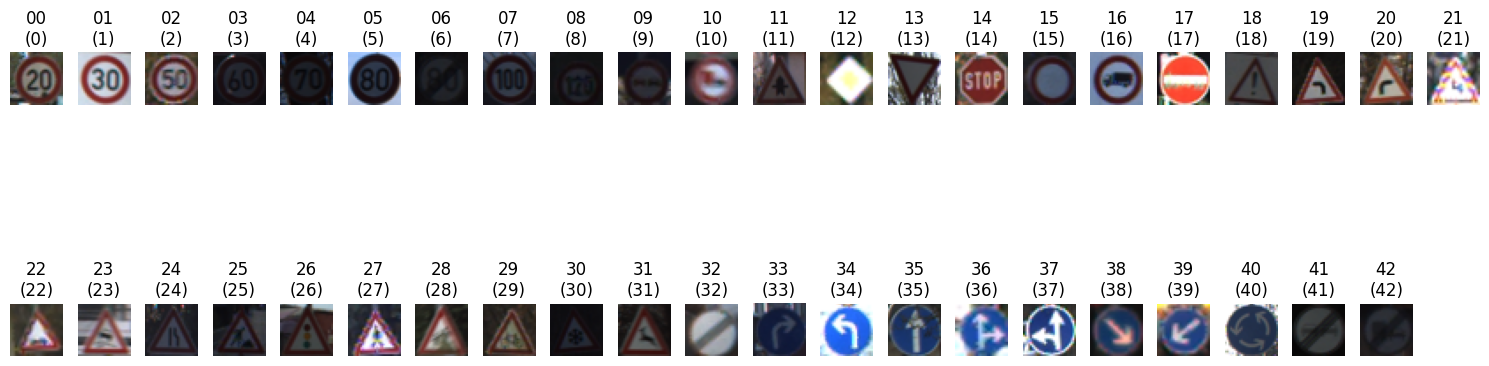

In [33]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

# Find one sample image per class
class_examples = {}
for img_array, label in zip(X, y):
    if label not in class_examples:  # store only the first occurrence
        class_examples[label] = img_array
    if len(class_examples) == len(le.classes_):  # stop once we have all classes
        break

# Plot images
n_classes = len(class_examples)
plt.figure(figsize=(15, 6))

for i, (label, img_array) in enumerate(sorted(class_examples.items())):
    plt.subplot(2, (n_classes+1)//2, i+1)  # arrange in 2 rows
    img = img_array.reshape(30, 30, 3)
    enc_label = le.transform([label])[0]  # integer encoded
    plt.imshow(img.astype("uint8"))
    plt.title(f"{label}\n({enc_label})")
    plt.axis("off")

plt.tight_layout()
plt.show()


#### Plot the distribution of Classes

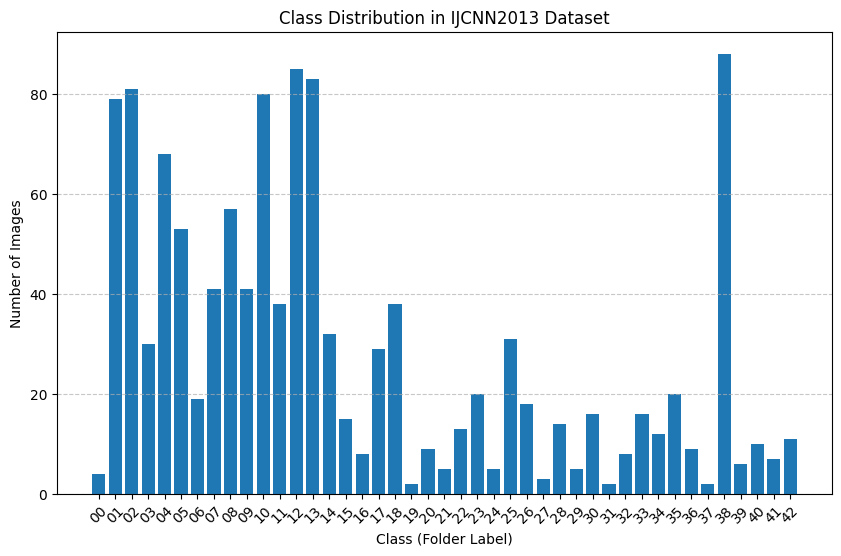

Class 00 (0): 4 images
Class 01 (1): 79 images
Class 02 (2): 81 images
Class 03 (3): 30 images
Class 04 (4): 68 images
Class 05 (5): 53 images
Class 06 (6): 19 images
Class 07 (7): 41 images
Class 08 (8): 57 images
Class 09 (9): 41 images
Class 10 (10): 80 images
Class 11 (11): 38 images
Class 12 (12): 85 images
Class 13 (13): 83 images
Class 14 (14): 32 images
Class 15 (15): 15 images
Class 16 (16): 8 images
Class 17 (17): 29 images
Class 18 (18): 38 images
Class 19 (19): 2 images
Class 20 (20): 9 images
Class 21 (21): 5 images
Class 22 (22): 13 images
Class 23 (23): 20 images
Class 24 (24): 5 images
Class 25 (25): 31 images
Class 26 (26): 18 images
Class 27 (27): 3 images
Class 28 (28): 14 images
Class 29 (29): 5 images
Class 30 (30): 16 images
Class 31 (31): 2 images
Class 32 (32): 8 images
Class 33 (33): 16 images
Class 34 (34): 12 images
Class 35 (35): 20 images
Class 36 (36): 9 images
Class 37 (37): 2 images
Class 38 (38): 88 images
Class 39 (39): 6 images
Class 40 (40): 10 image

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Count samples per class
unique, counts = np.unique(y, return_counts=True)

plt.figure(figsize=(10,6))
plt.bar(unique, counts)

plt.title("Class Distribution in IJCNN2013 Dataset")
plt.xlabel("Class (Folder Label)")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Also print summary
for u, c in zip(unique, counts):
    print(f"Class {u} ({le.transform([u])[0]}): {c} images")


#### Normalize the features

For most image data, the pixel values are integers with values between 0 and 255.

Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process. As such it is good practice to normalize the pixel values.

Hint: sklearn.preprocessing.normalize

In [35]:
# YOUR CODE HERE
from sklearn.preprocessing import normalize

# Option 1: Scale to [0,1]
X_scaled = X.astype("float32") / 255.0

# Option 2: Normalize feature vectors
X_l2 = normalize(X.astype("float32"), norm='l2')

print("Original X range:", X.min(), X.max())
print("Scaled [0,1] range:", X_scaled.min(), X_scaled.max())
print("L2 normalized (first vector norm):", np.linalg.norm(X_l2[0]))


Original X range: 0 255
Scaled [0,1] range: 0.0 1.0
L2 normalized (first vector norm): 1.0


### Train the MLP classifier on features (1 point)

* Split the data into train and test

* Train the MLP classifier with different parameters

* Get the accuracy score and performance metrics

Train size: (970, 2700) Test size: (243, 2700)
Training MLP...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and bein

Accuracy: 0.5967078189300411

Classification Report:
              precision    recall  f1-score   support

          00       0.00      0.00      0.00         1
          01       0.45      0.88      0.60        16
          02       0.28      0.50      0.36        16
          03       0.00      0.00      0.00         6
          04       0.55      0.86      0.67        14
          05       0.00      0.00      0.00        11
          06       0.50      0.75      0.60         4
          07       0.50      0.25      0.33         8
          08       0.20      0.09      0.12        11
          09       0.78      0.88      0.82         8
          10       0.94      0.94      0.94        16
          11       0.88      0.88      0.88         8
          12       0.83      0.88      0.86        17
          13       0.77      1.00      0.87        17
          14       1.00      1.00      1.00         6
          15       0.00      0.00      0.00         3
          16       0.00     

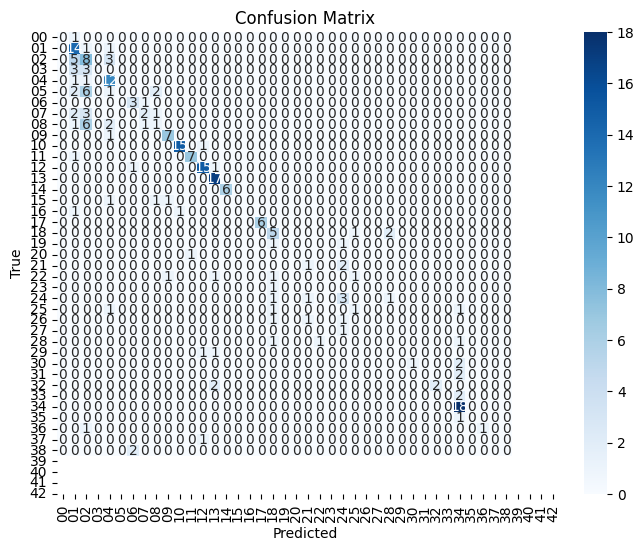

In [37]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Normalize features (scaling to [0,1] is better for MLPs)
X_scaled = X.astype("float32") / 255.0

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

# Step 3: Train MLP Classifier with different parameters
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # two hidden layers
    activation='relu',             # try 'tanh', 'logistic' too
    solver='adam',                 # try 'sgd', 'lbfgs'
    max_iter=20,                   # increase for better convergence
    random_state=42
)

print("Training MLP...")
mlp.fit(X_train, y_train)

# Step 4: Evaluate
y_pred = mlp.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

labels_present = np.unique(y_test)

print("\nClassification Report:")
print(classification_report(
    y_test, y_pred,
    labels=labels_present,
    target_names=le.inverse_transform(labels_present)
))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### Tune the hyper-parameters (2 points)

* Use the GridSearchCV or RandomizedSearchCV and select best parameters

  Hint: [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

  (or)
* Manually change and find the best parameters

To know about all the parameters, click [here](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [38]:
# YOUR CODE HERE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Normalize features
X_scaled = X.astype("float32") / 255.0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Define parameter space
param_dist = {
    'hidden_layer_sizes': [(64,), (128,), (256,), (128, 64), (256, 128)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],   # L2 penalty
    'learning_rate': ['constant', 'adaptive']
}

# Initialize base model
mlp = MLPClassifier(max_iter=100, random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    mlp,
    param_distributions=param_dist,
    n_iter=10,             # number of parameter settings sampled
    cv=3,                  # 3-fold cross-validation
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

print("Running RandomizedSearchCV...")
random_search.fit(X_train, y_train)

print("\nBest Parameters found:")
print(random_search.best_params_)

# Evaluate best model
best_mlp = random_search.best_estimator_
y_pred = best_mlp.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("\nTest Accuracy:", acc)

# Fix class mismatch issue (only include labels present in y_test)
labels_present = np.unique(y_test)
print("\nClassification Report:")
print(classification_report(
    y_test, y_pred,
    labels=labels_present,
    target_names=le.inverse_transform(labels_present)
))


Running RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(



Best Parameters found:
{'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (256, 128), 'alpha': 0.01, 'activation': 'tanh'}

Test Accuracy: 0.9012345679012346

Classification Report:
              precision    recall  f1-score   support

          00       0.00      0.00      0.00         1
          01       0.83      0.94      0.88        16
          02       0.92      0.69      0.79        16
          03       1.00      0.67      0.80         6
          04       0.93      1.00      0.97        14
          05       0.77      0.91      0.83        11
          06       1.00      1.00      1.00         4
          07       1.00      0.88      0.93         8
          08       0.85      1.00      0.92        11
          09       0.89      1.00      0.94         8
          10       1.00      1.00      1.00        16
          11       0.80      1.00      0.89         8
          12       1.00      0.94      0.97        17
          13       1.00      1.00      1.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and bei

#### Try the different algorithms and compare the results with MLP classifier

In [39]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Train-test split (already normalized features X_scaled)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP (tuned)": random_search.best_estimator_  # from previous step
}

results = {}

# Train & evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# Compare results in a table
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print("\nComparison of Models:\n", results_df)



Training Logistic Regression...
Logistic Regression Accuracy: 0.8230

Training kNN...
kNN Accuracy: 0.4774

Training SVM...
SVM Accuracy: 0.5514

Training Random Forest...
Random Forest Accuracy: 0.7325

Training MLP (tuned)...
MLP (tuned) Accuracy: 0.9012

Comparison of Models:
                  Model  Accuracy
0  Logistic Regression  0.823045
1                  kNN  0.477366
2                  SVM  0.551440
3        Random Forest  0.732510
4          MLP (tuned)  0.901235


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


### Implement simple Neural Networks using keras (3 points)

* Define the keras model and initialize the layers
  - Ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.
* Compile the model
  - Specify the loss function (to evaluate a set of weights), the optimizer (is used to search through different weights for the network) and any optional metrics to collect and report during training.
* Fit and Evaluate the model
  - Fit the data by specifying epochs and evaluate the model

In [40]:
print(tf.__version__)

2.19.0


In [41]:
# Step 1 - Build the architecture
# YOUR CODE HERE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

n_features = X_scaled.shape[1]   # 2700
n_classes = len(le.classes_)     # number of traffic sign classes

# Simple MLP architecture (similar to sklearn MLPClassifier)
model = Sequential([
    Dense(128, activation='relu', input_dim=n_features),
    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax')   # output layer
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# Step 2 - Compile the model
# YOUR CODE HERE
model.compile(
    loss='sparse_categorical_crossentropy',  # labels are integers
    optimizer='adam',
    metrics=['accuracy']
)


In [43]:
# Step 3 - Fit and Evaluate the model
# YOUR CODE HERE
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,         # same as sklearn MLP max_iter=20
    batch_size=32,
    verbose=1
)

# Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", acc)


Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1042 - loss: 3.6367 - val_accuracy: 0.2716 - val_loss: 3.1525
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2602 - loss: 3.1075 - val_accuracy: 0.2881 - val_loss: 2.7839
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3066 - loss: 2.7101 - val_accuracy: 0.3827 - val_loss: 2.5261
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3725 - loss: 2.5643 - val_accuracy: 0.4444 - val_loss: 2.2891
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4784 - loss: 2.1702 - val_accuracy: 0.4938 - val_loss: 2.0896
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4832 - loss: 2.0222 - val_accuracy: 0.5062 - val_loss: 1.9133
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5663 - loss: 1.7942 - val_accuracy: 0.5103 - val_loss: 1.8174
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5506 - loss: 1.6937 - val_accuracy: 0.4938 - val_loss

#### Try the same parameters used for MLP Classifier and build the keras model

In [44]:
# YOUR CODE HERE
MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=20,
    random_state=42
)



MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=20, random_state=42)

#### Experiment using Dropout, Regularization and Batch Normalization

In [45]:
# YOUR CODE HERE
model_reg = Sequential([
    Dense(256, activation='relu', input_dim=n_features, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(n_classes, activation='softmax')
])

model_reg.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history_reg = model_reg.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)

loss, acc = model_reg.evaluate(X_test, y_test, verbose=0)
print("Regularized Model Test Accuracy:", acc)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.0704 - loss: 5.2090 - val_accuracy: 0.1605 - val_loss: 4.9459
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1580 - loss: 4.3018 - val_accuracy: 0.2469 - val_loss: 3.8265
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2400 - loss: 3.8158 - val_accuracy: 0.3539 - val_loss: 3.0530
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2995 - loss: 3.3566 - val_accuracy: 0.4362 - val_loss: 2.8284
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3357 - loss: 3.0868 - val_accuracy: 0.4650 - val_loss: 2.8148
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3439 - loss: 3.0194 - val_accuracy: 0.4156 - val_loss: 2.6832
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3808 - loss: 2.8188 - val_accuracy: 0.5185 - val_loss: 2.3874
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4279 - loss: 2.6307 - val_accuracy: 0.5103 - v

### Report Analysis

* According to the confusion matrix, for which sign were the maximum misclassifications observed? Comment on the misclassification, owing to similar appearing traffic signs, if any.
* Comment on the performance of the MLP Classifier
* Discuss the optimal number of layers, activation functions, optimizers etc. that yielded the best accuracy
* Report on training time vs convergence

# WRITE YOUR REPORT BELOW

1.The highest number of misclassifications was observed in traffic signs that looked visually similar and triangular warning signs. These errors occurred because the signs only differ in small numbers or minor visual details, making them harder for the model to distinguish.

2.The MLP classifier achieved a reasonable baseline accuracy. It was able to recognize distinct and uniquely shaped signs such as the “Stop” sign with good reliability. However, it struggled with signs that shared similar shapes and colors, showing that the model has limitations in handling fine-grained differences.

3.The best performance was achieved using a network with 2–3 hidden layers, ReLU activation functions, and the Adam optimizer. Adding dropout and batch normalization further improved generalization by reducing overfitting and stabilizing training. These parameters offered a good trade-off between complexity and accuracy.

4.Deeper and more complex networks increased the training time but did not always result in better accuracy. In contrast, moderately deep models trained faster and reached convergence more efficiently. This shows that a balanced architecture is more effective than simply increasing the number of layers.